# Eksik Gözlem Analizi

>veri seetindeki eksiklik rastgele oluşmamışsa silme işlemi ciddi yanlılıklara sebebiyet verir.

* Veri Serindeki eksikliğin yapısal bir eksiklik olup olmadığının bilimmesi gerekir
* NA ger zaman eksiklik anlamına gelmez
* Bilgi kaybı

### Eksik Veri Türleri

* Tümüyle raslantısal kayıp: Dipğer değişkenlerden yada yapısal problemlerden kaynaklanmayan tamame rastgele oluşan gözlemler
* Raslantısal kayıp: Diğer değişkenlere bağlı olarak oluşabilen eksiklik türe
* Raslantısal ommayan kayıp: Göz ardı edilemeycek olan yapısal problemler ile ortaya çıkan eksiklik türü

### Rassallık Kontrol Yöntemleri
* Görsel teknikler
* bağımsız iki örneklem T testi
* korelasyı-on testi
* Little'nin MCAR testi 

" The ide of imputation is both seductive and dangerous "

### Silme Yöntemleri
* Gözlem yada değişkne silme yöntemi
* Liste bazında silme yöntemi (listwise method)
* Çifler bazında silme yöntemi (pairwise method)


### Değer Atama Yöntemleri
* Ortanca, ortalama, medyan
* En benzer birime atama (hot deck)
* Dış kaynaklı atama 

### Tahmine Dayalı Yöntemler
* Makine öğrenmesi
* EM
* Çoklu atama yöntemi

In [17]:
# Hızlı çözüm
import numpy as np
import pandas as pd
V1= np.array([1,3,6,np.NAN, 7,1,np.NAN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df=pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3 } )
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [13]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [5]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [6]:
df.isnull().sum().sum()

7

In [8]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [16]:
df[df.isnull().any(axis=1)]
# e n az bir tane eksik değer olanları getir

,V1,V2,V3
0,1.0,7.0,NaN
1,2.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [18]:
df[df.notnull().all(axis=1)]
#hepsi dolu olanları getir
#sütunlara yani değişkenlere göre

,V1,V2,V3
2,3.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [19]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]
#all(axis=1) kullanmadan hepsi dolu olanları ek-lde etme

,V1,V2,V3
2,3.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [21]:
#eksik değerlerin direkt silinmesi
df.dropna()
#sadece bir tane dahi eksik değer olan gözlmeleri siler bu fonksiyon

,V1,V2,V3
2,3.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [23]:
df
# ama kalıcı olmaz

,V1,V2,V3
0,1.0,7.0,NaN
1,2.0,NaN,12.0
2,3.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [25]:
#kalıcı olması için  inplace aktifleştirilir
df.dropna(inplace=True)
df

,V1,V2,V3
2,3.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [42]:
# Basit değer atama
df["V1"]
# eksik değerler ortlamaa atama

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [41]:
#df["V1"][df["V1"].isnull()]=df["V1"].mean()
#df["V1"] my meethod 

df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [45]:
df["V1"].fillna(0)
# yani fillna fnksiyonu boşluları isteğimiz değer ile foldurmamızı sağlar

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [46]:
#çok değişkenli doldurma işlemi
#satırlara göre doldurma yapıcaaz



In [47]:
df.apply(lambda x: x.fillna(x.mean()), axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Eksik Veri Görselleştirme

In [48]:
import missingno as msno

<AxesSubplot: >

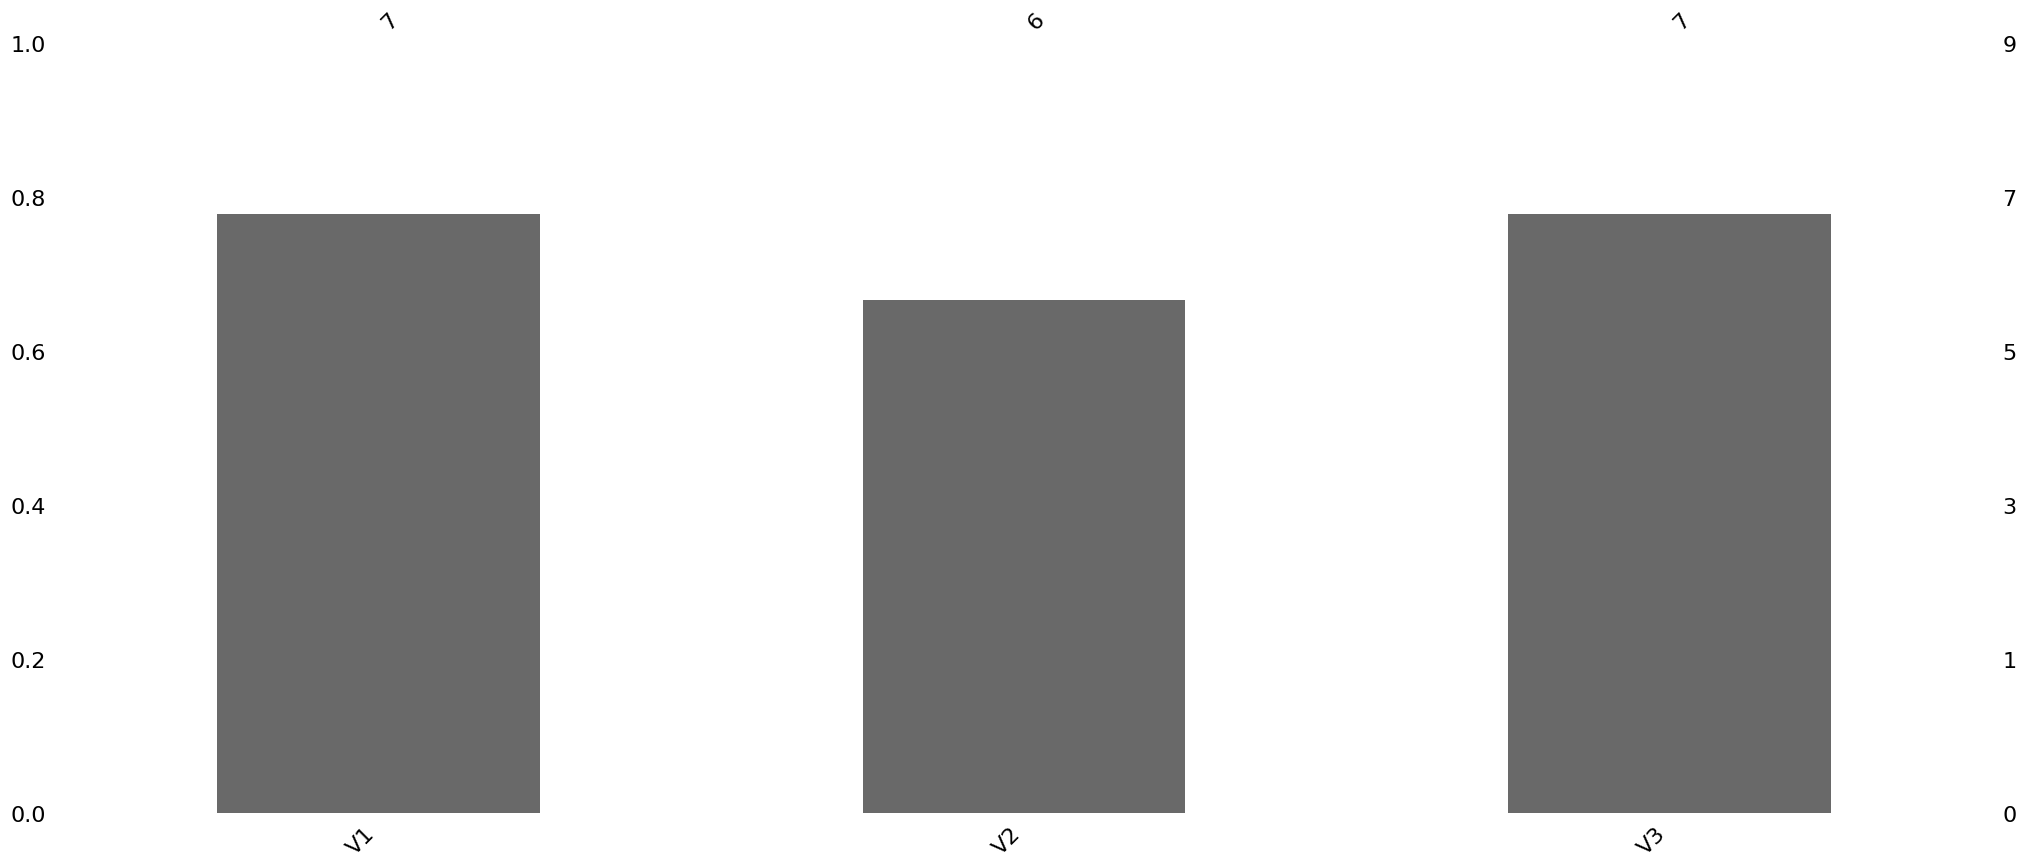

In [51]:
msno.bar(df)
#değişkenlerdeki eksikliği oransal olarak gözteriri
# alttaki değişken ismi
#üstteki o değişkendeki tam gözlem sayısı
#sağ taraf gözlemsayısını
#sol taraf yüzdeui verir

<AxesSubplot: >

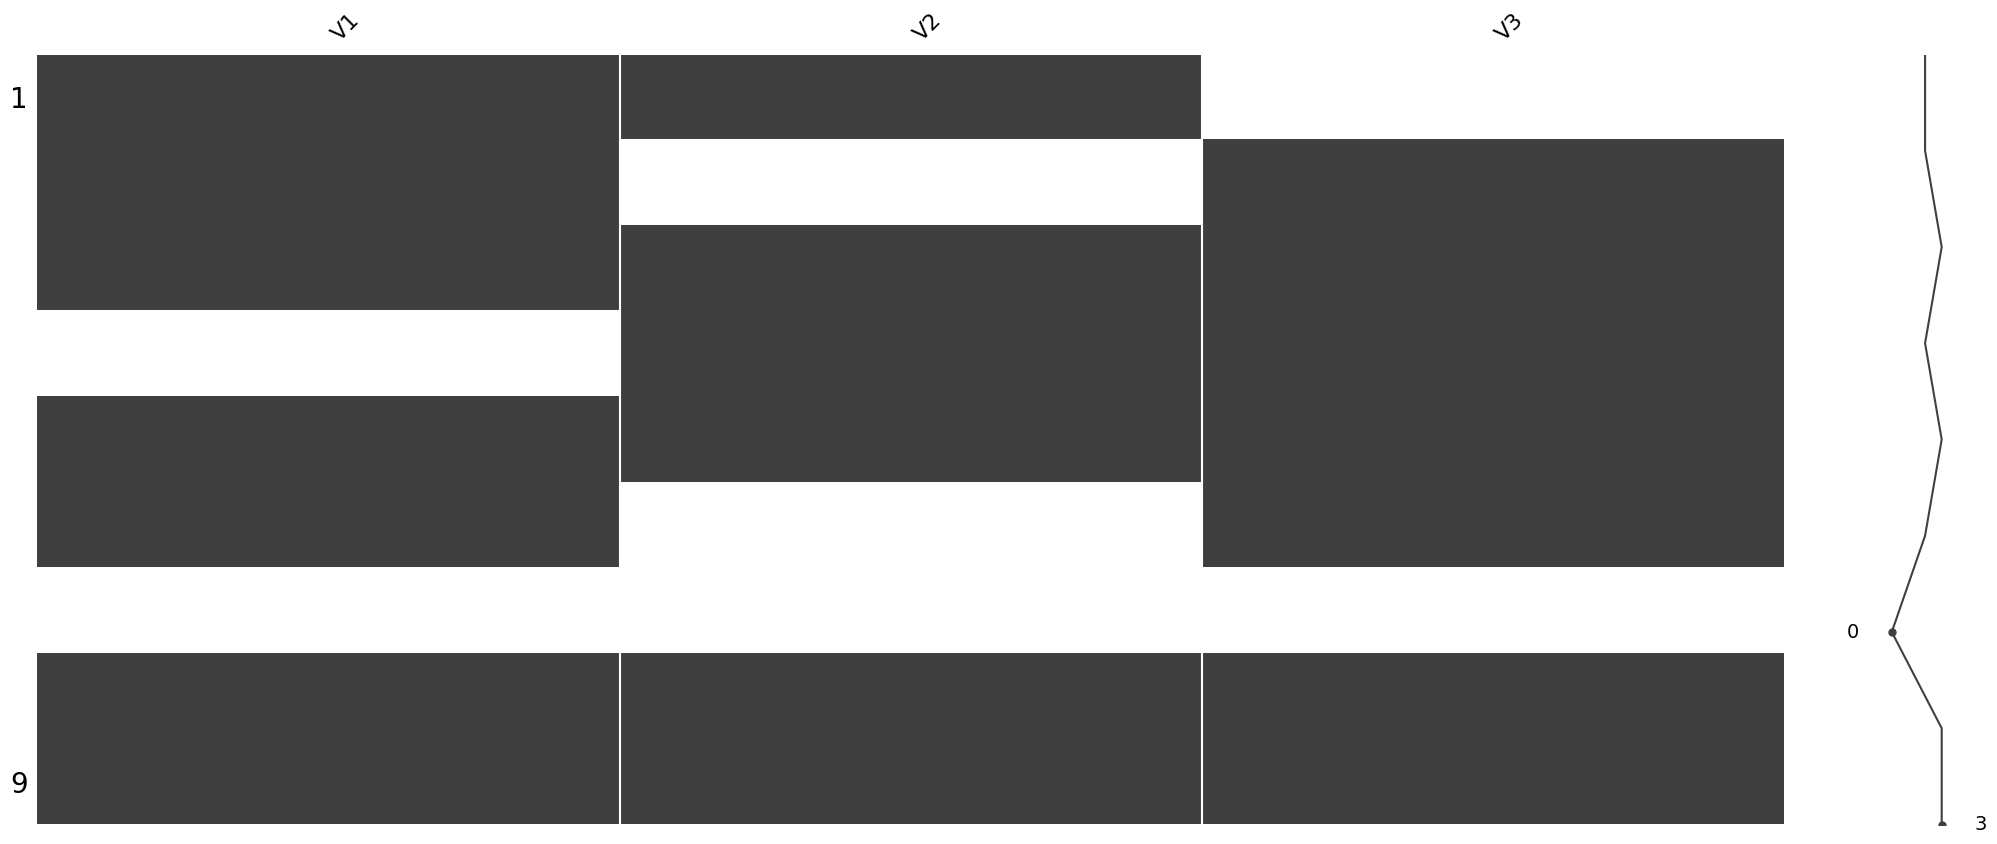

In [54]:
msno.matrix(df)
# sol kaçıncı gözlemolduğunu gösterir 
#eksiklei boş gösteriyor işte rahtlıkla görebilelim diye
#sağ taraf aynı anda dolu olan ları gösterir

In [58]:
#daha net görmek için başka bir data set ile deneyelim
import seaborn as sns
data=sns.load_dataset("planets")
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


<AxesSubplot: >

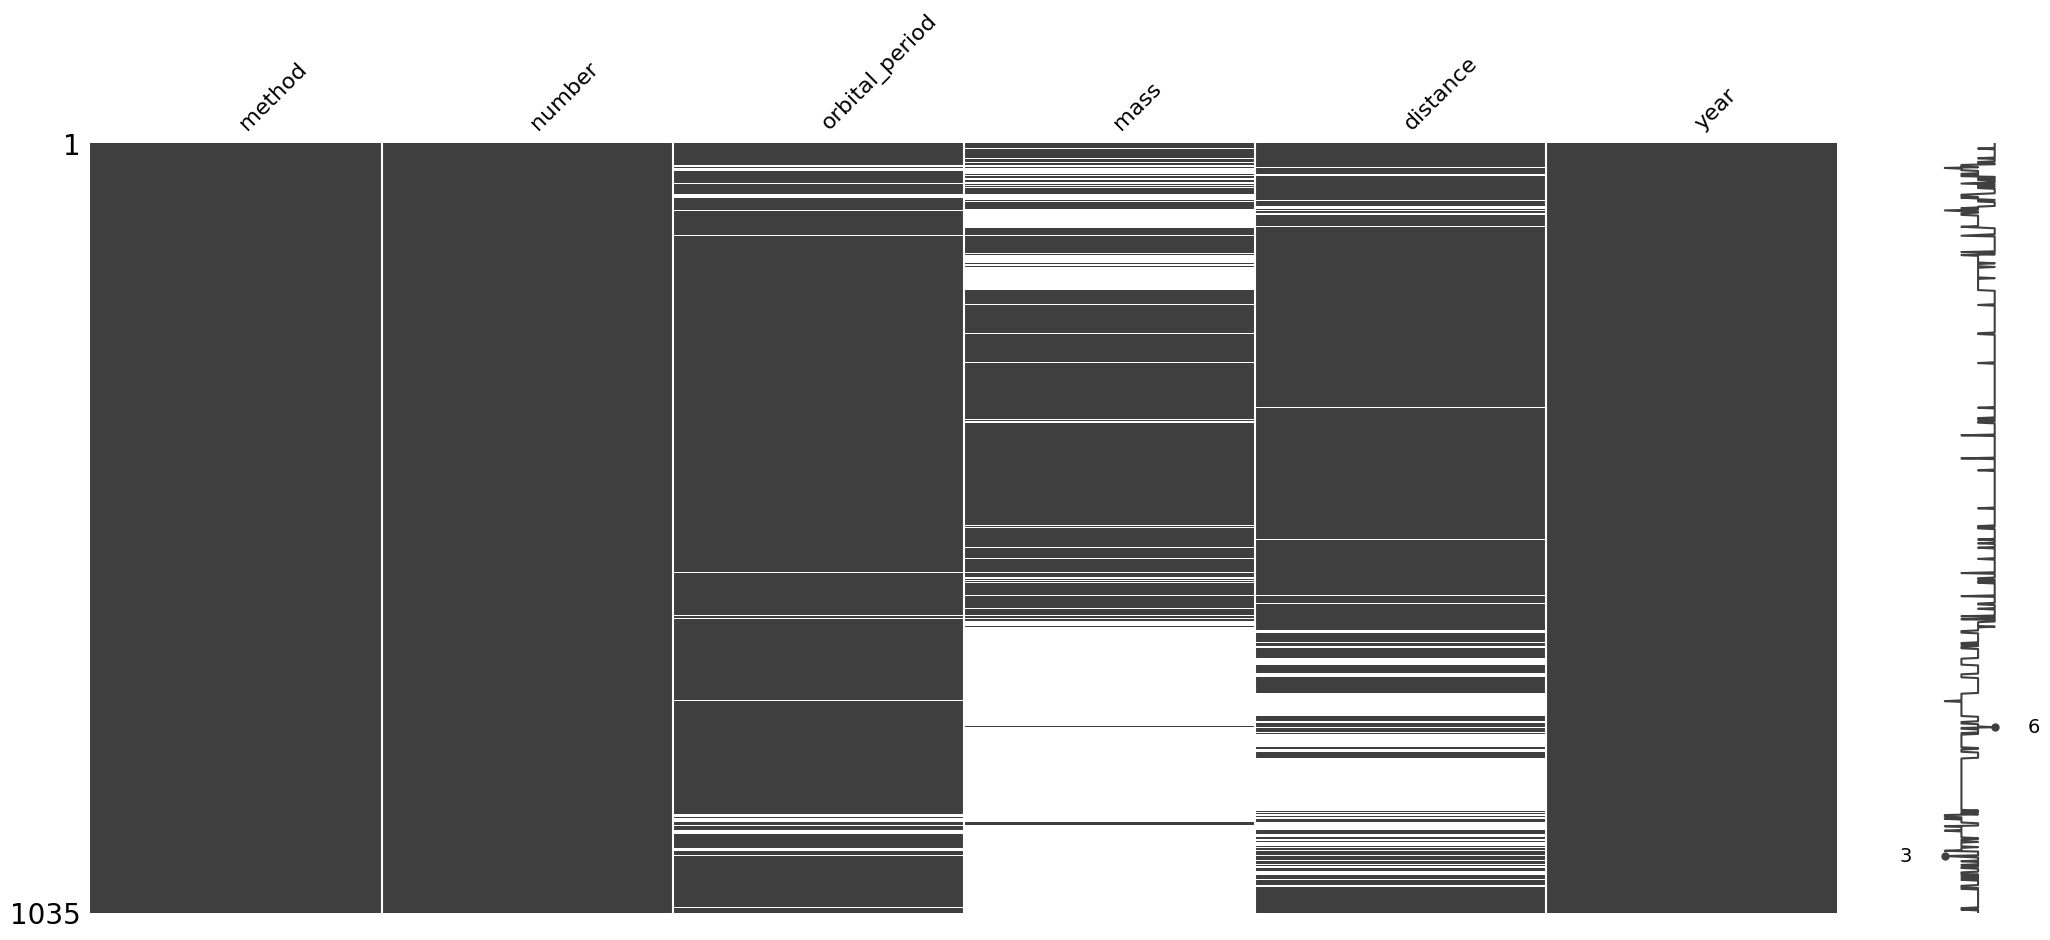

In [57]:
msno.matrix(data)

In [63]:
# aynı anda boş olma 3 
#aynı anda dolu olma 6 gözlenir

#rassallik var mı yok mu diye bakıcak olursak
# mesala orbital de ne zaman eksiklik olsa mass de de olmış ancak mass de her eksiklik olduğunda orbitalde almmıiş a zmn bağımllılık net :)

# bakalım ama distance ile mass arasında yine bağımlılık var gibi ancak net ilişki yok

# o zaman biz bu veri srtindeki esikliklerin yapısal olabilceğini düşünüyoruz
#netleştirmek için heatmap kullanalım

<AxesSubplot: >

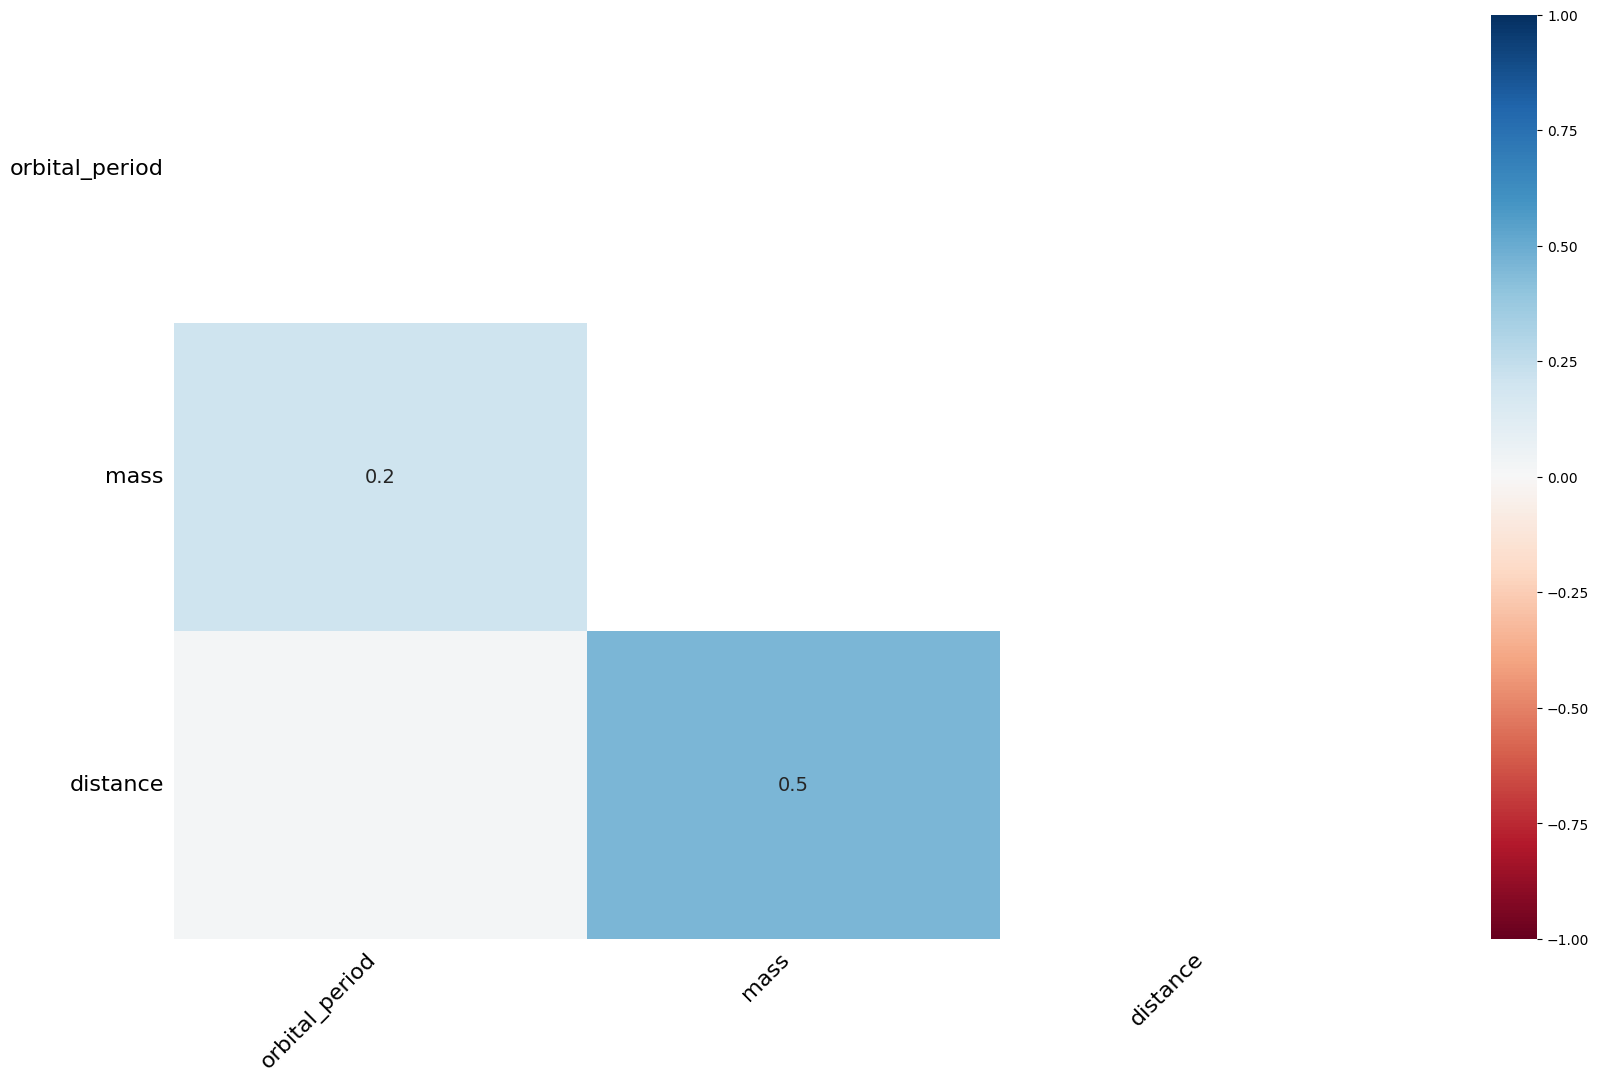

In [65]:
msno.heatmap(data)
#hocam anladık mı mevzuyu normalde ola yöntemleri kullanıyoruz ma missingno kütüphanesindekşler eksik gözlemler eodaklı çalışıyor

In [66]:
# nality corralation denen bir -1 ile +1 arasında yer alan değer veriri

# koralasyon ilişki demek biliyoruz. Nality yokluk boşluk demektir yani değişkenlerin arasında boşluk koralasyanu yani ilişkisi varsa
#bize bunu numerik olarak gösteriri
#1 en yüksek 0 en düşük bağımlı eksikliktir 

#heatmap a baktığımızda mass ile distance arasında orta şiddetli nlity corralation gözleriz. afilli :)) 
#yani bu data set rassal eksikliğe sahip değildir. Silme yada doldurma yapmamak yapılacaksa da dikkarli olmak gerekkli önlemler alınmalıdır

In [3]:
#Silme yöntemi
df.dropna() # bu şekilde sadece bir tane dahi eksikği olan gözlemi silme yapıyoruz

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [5]:
df.dropna(how="all")#burada ise tüm değerleri eksik gözlemi silmiş oluyoruz

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [7]:
df.dropna(axis=1)#değişkenler bazında slime. en az bir tane eksiği olan değişkenş silme
#hepsi gider çünkü veri setimizde her değişkenin en az bir ta e eksik değeri vardı :))

""
0
1
2
3
4
5
6
7
8


In [9]:
df.dropna(axis=1, how="all")#tüm değerleri na olan değişkeni silme
#ama tüm değerleri na olna değişkenimiz olmadığı için silemedi. hadi önce ekleyip sonra silelim

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [12]:
df["V4"]=np.NAN
df

,V1,V2,V3,bos,V4
0,1.0,7.0,NaN,NaN,NaN
1,3.0,NaN,12.0,NaN,NaN
2,6.0,5.0,5.0,NaN,NaN
3,NaN,8.0,6.0,NaN,NaN
4,7.0,12.0,14.0,NaN,NaN
5,1.0,NaN,7.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN,NaN
8,15.0,3.0,31.0,NaN,NaN


In [13]:
df.dropna(axis=1, how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [14]:
# ancak dropna kalıcı değişiklik yapmaz bunun için inplace aktifleştirilir :))

In [16]:
df.dropna(axis=1, how="all",inplace=True)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Değer Atama Yöntemleri

### * Sayısal değişkemlerde atama 

In [18]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [19]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [22]:
#bu şekilde fillna ile kolaylıkla na değerlere atama yapabiliriz
# çoklu değişken içinde apply kullanılır
df.apply(lambda x: x.fillna(x.mean()))
#buradaki x ler sütunları değişkenleri ifade eder

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [25]:
#çoklu değişken iiçn apply kullanmadan atama yapma
df.fillna(df.mean()[:])
#yine her sütuda kendi ortalaması ile doldurur 

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [26]:
#ancak hepsini ortalam ile değilde bir kismını ortalama ile bir kısmını başka bir şeyle dolfurmak istersek
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [28]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [30]:
# sonn bir yol daha :))
df.where(pd.notna(df), df.mean(), axis="columns")
#notna ile yakalıdığı na değerlere ikinci parametreyi yani sutunun orlamasını atıyro zatem üçüncü paremetere ile sütun bazinda işlem yapacağımız belirtiyoruz

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0
